In [58]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
#To get live coin prices
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(),','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [60]:
price('LTC', exchange = 'Coinbase')

{'USD': 57.98}

In [61]:
price('NEO', ['BTC', 'ETH', 'USD'])

{'BTC': 0.002735, 'ETH': 0.08021, 'USD': 18.05}

## Daily Historical Price (OHLCV)

In [62]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [63]:
df = daily_price_historical('BTC', 'USD')
print("Max length = %s" % len(df))
print("Max time = %s" % (df.timestamp.max() - df.timestamp.min()))
df.head()

Max length = 3003
Max time = 3002 days 00:00:00


close     high      low     open        time  volumefrom  volumeto  \
0  0.04951  0.04951  0.04951  0.04951  1279324800       20.00    0.9902   
1  0.08584  0.08585  0.05941  0.04951  1279411200       75.01    5.0900   
2  0.08080  0.09307  0.07723  0.08584  1279497600      574.00   49.6600   
3  0.07474  0.08181  0.07426  0.08080  1279584000      262.00   20.5900   
4  0.07921  0.07921  0.06634  0.07474  1279670400      575.00   42.2600   

            timestamp  
0 2010-07-17 08:00:00  
1 2010-07-18 08:00:00  
2 2010-07-19 08:00:00  
3 2010-07-20 08:00:00  
4 2010-07-21 08:00:00

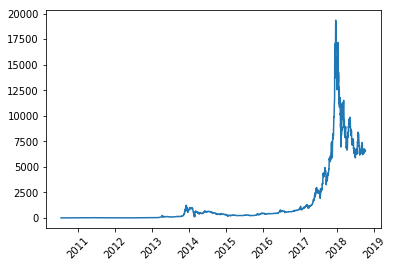

In [64]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

## Hourly Historical Price (OHLCV)

In [65]:
def hourly_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

Max length = 2001
Max time = 83 days 08:00:00


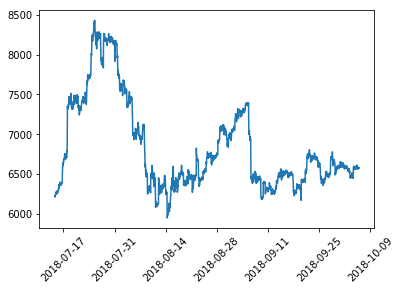

In [66]:
time_delta = 1 # Bar width in hours
df = hourly_price_historical("BTC", "USD", 9999, time_delta)
print("Max length = %s" % len(df))
print("Max time = %s" % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

Max length = 84
Max time = 83 days 00:00:00


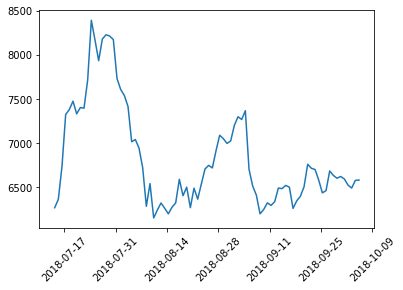

In [67]:
time_delta = 24 # Bar width in hours
df = hourly_price_historical("BTC", "USD", 9999, time_delta)
print("Max length = %s" % len(df))
print("Max time = %s" % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

## Historical Price by Minute (OHLCV)

In [68]:
def minute_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

### 1 Minute Prices (BTC)

Max length = 2001
Max time = 1 days 09:20:00


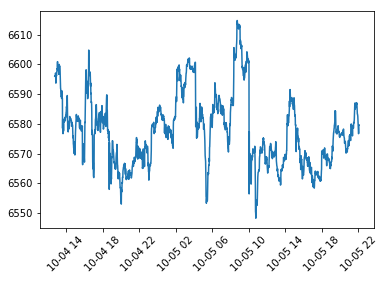

In [69]:
time_delta = 1 # Bar width in minutes
df = minute_price_historical("BTC", "USD", 9999, time_delta)
print("Max length = %s" % len(df))
print("Max time = %s" % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

### 15 Minute Prices (BTC)

Max length = 134
Max time = 1 days 09:15:00


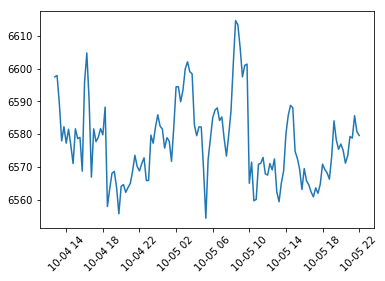

In [70]:
time_delta = 15 # Bar width in minutes
df = minute_price_historical("BTC", "USD", 9999, time_delta)
print("Max length = %s" % len(df))
print("Max time = %s" % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

In [71]:
def coin_list():
    url = 'https://www.cryptocompare.com/api/data/coinlist/'
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [73]:
# Since this is copy-pasted wrongly(mostly) at a lot of places across the web, i'm putting the fixed, updated version here, mainly for self-reference

## Add this to the first block in your note book
import uuid
from IPython.core.display import display, HTML

import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())
        # This line is missed out in most of the versions of this script across the web, it is essential for this to work interleaved with print statements
        self._ipython_display_()
        
    def _ipython_display_(self):
        display(HTML('<div id="{}" style="height: auto; width:100%;"></div>'.format(self.uuid)))
        display(HTML("""<script>
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
          renderjson.set_show_to_level(1)
          document.getElementById('%s').appendChild(renderjson(%s))
        });</script>
        """ % (self.uuid, self.json_str)))

In [75]:
data = coin_list()
#RenderJSON(data)

In [76]:
symbol_id_dict = {symb: int(d['Id']) for symb, d in data.items()}

## Live Social Status

In [1]:
def live_social_status(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC':1182,
            'ETH':7605,
            'LTC':3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/socialstats/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [ ]:
data = live_social_status